In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')

#### 'Haberman' data set contains data about the survival of patients who had undergone surgery for breast Cancer .

Features Information - 

1) Age    - Age of the person at the time of operation.<br>
2) Year   - Year of operation for the respective patient.<br>
3) Nodes  - No of positive axillary nodes detected during the surgery.<br>
4) Status - Survival status of the patient (1 -> when person survived more than 5 years and 2 -> when person survived less than 5 Years).


In [2]:
df_haber = pd.read_csv('haberman.csv')
df_haber.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
df_haber.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


# (1) Basic Information about datapoint and features .

In [4]:
df_haber.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### In the below code , one package <font color='red'><i>'pandas_profiling'</i></font> is used which is very similar to pandas  is being used which helps to depict a clear idea about each feature like missing values , unique values , histogram plot for each feature , frequency of each value for all the features , mean , max , min , correlation etc. and further helps with the pre processing and data analysis of each indivisual feature .



In [5]:
pandas_profiling.ProfileReport(df_haber)

Number of variables,4
Number of observations,306
Total Missing (%),0.0%
Total size in memory,9.6 KiB
Average record size in memory,32.3 B
Numeric,3
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


**Observations** 

    1.There are 309 data points and 4 features .
    2.There are no missing records for any of the features , so we dont have fill out some empty rows or values.
    3.Age vary between 30 to 83 and with a median age of 52.
    4.75% of people has node less than or equal to 4 and 25% of people have node 0.
    5.Datatset is imbalanced with people having status as 1 or survived more than 5 year with a percentage of 73.5%

#### Column Names in the dataset

In [6]:
df_haber.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

# (2) Different plotting technique to visualise the features .

#### There are multiple plot available for Univariate and Multivariate analysis .

### (2.1) 2-D Scatter Plot

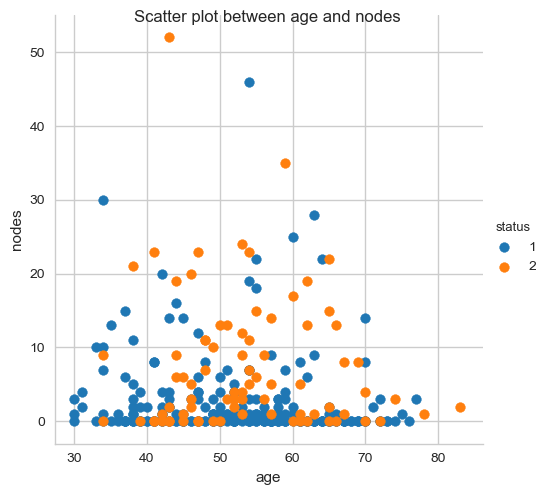

In [7]:
sns.set_style("whitegrid")
g =sns.FacetGrid(df_haber,hue="status",size=5).map(plt.scatter,"age","nodes").add_legend() \
  .fig.suptitle("Scatter plot between age and nodes")
plt.show()

**Observation**
1. Neither of the parameters could able to clearly distinguish between the status 1 or 2.
2. A lot of overlapping point at every instance.

### (2.2) Pair Plot

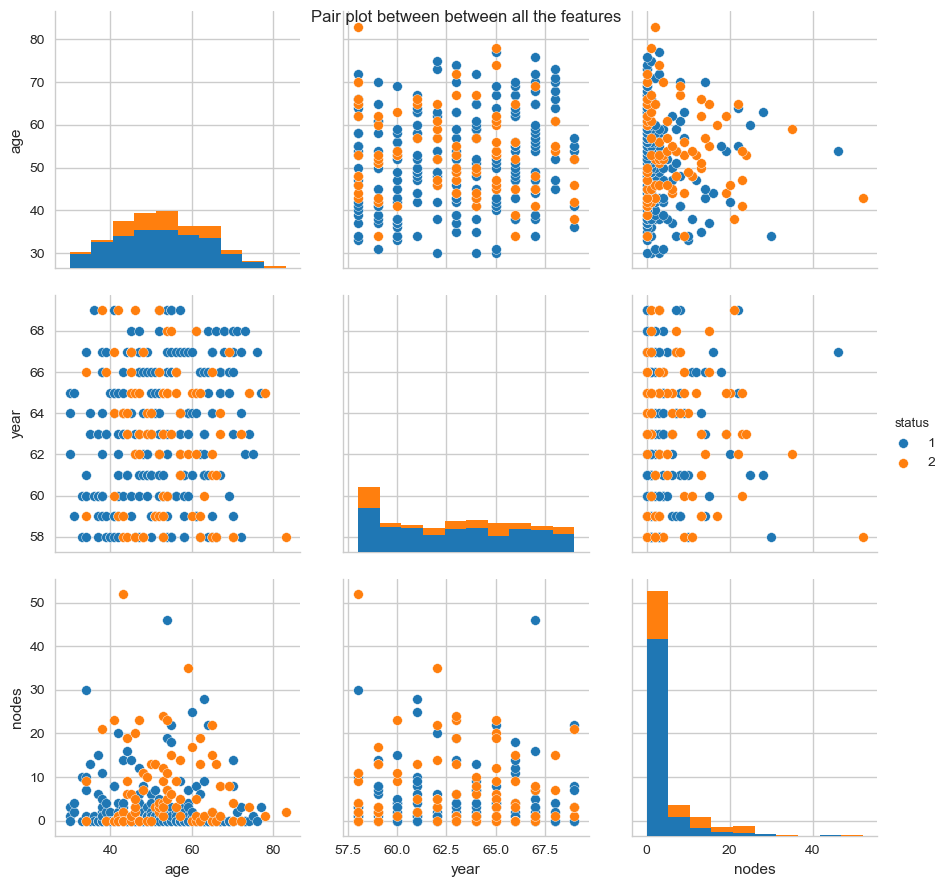

In [8]:
plt.close()
sns.set_style("whitegrid")
g = sns.pairplot(df_haber, hue="status", size=3 , vars = ['age' , 'year' ,'nodes'])

g.fig.suptitle("Pair plot between between all the features")
plt.show()

**Observation**
 1. Scatter plot between <i><b>year</b></i> and <i><b>nodes</b></i> is comparatively better than other scatter plot by which we can classify the status .
 2. Younger people has higher percentage of survival .   

## (2.3) Distribution Plot

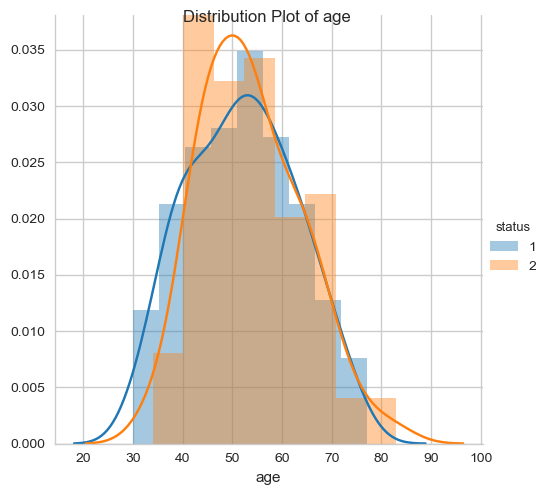

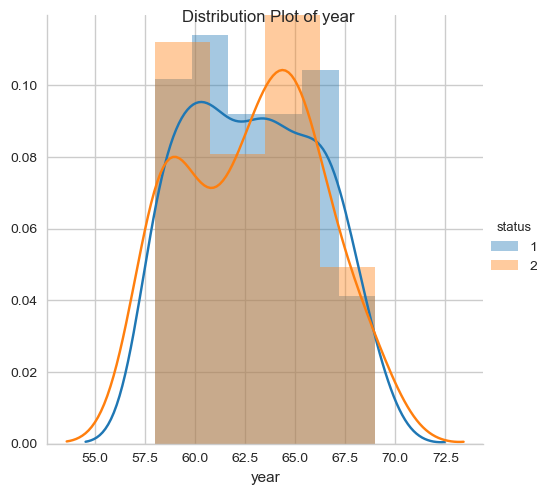

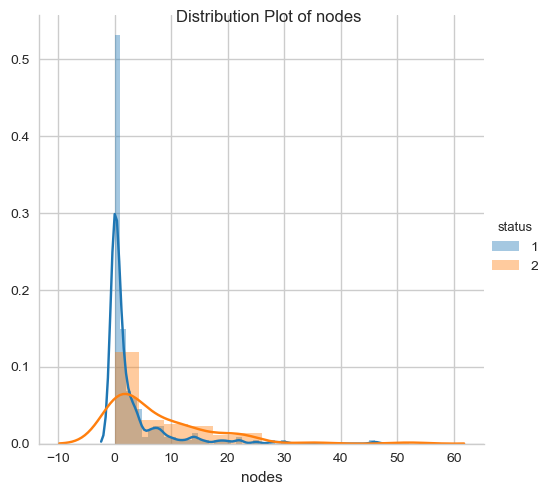

In [9]:
for feature in list(df_haber.columns[:-1]):
    sns.FacetGrid(df_haber, hue="status", size=5).map(sns.distplot, feature).add_legend().fig.suptitle('Distribution Plot of ' + feature);
    plt.show();

**Observation(s):**
    
    1.There is lot of overlapping for all the three plots.
    2.There is denser region near 0 for the pdf of nodes.
    [pdf(probability distribution function) ->Its the probability of a variable(here it is status) over the value from x-axis]

#### CDF(Cumulative Distribution Fucntion)

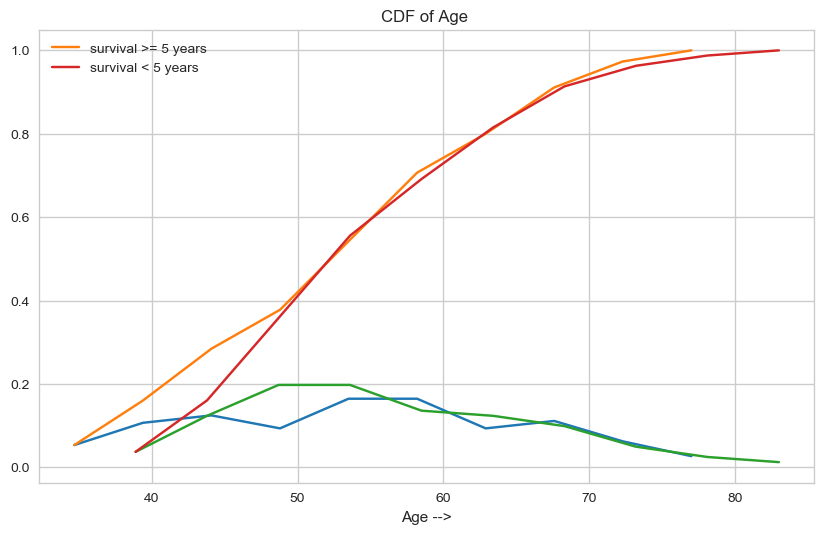

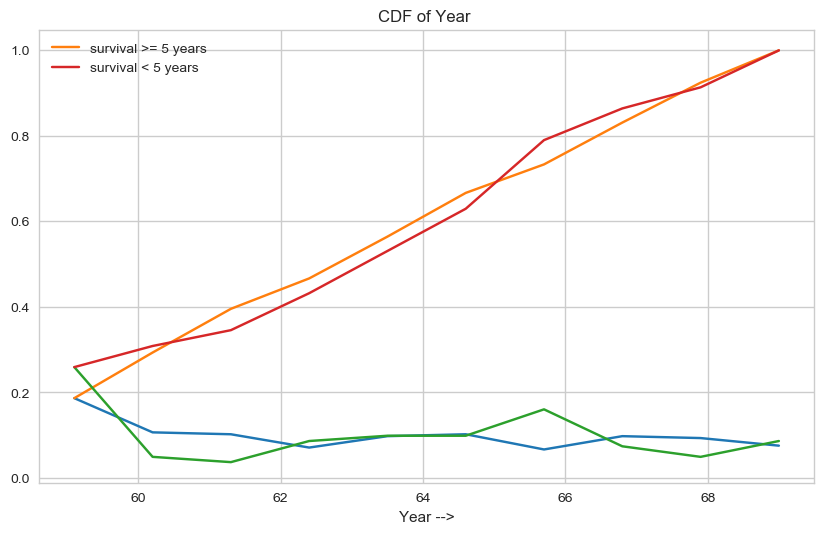

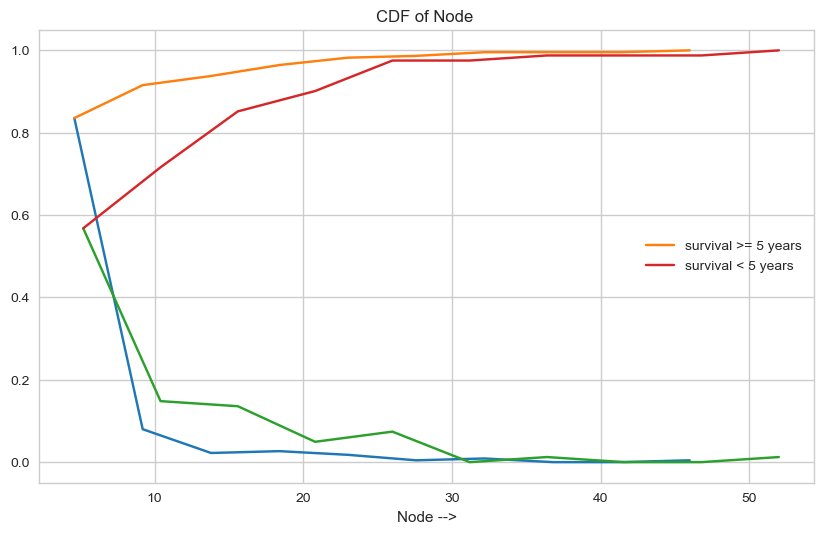

In [10]:
survive_more = df_haber[df_haber['status']==1]
survive_less = df_haber[df_haber['status']==2]

for counter, feature in enumerate(list(df_haber.columns)[:-1]):
    plt.figure(figsize=(10,20))
    plt.subplot(3,1, counter+1)
    count1 , bin_edges1 = np.histogram(survive_more[feature] , bins = 10 )
    pdf1 = count1/sum(count1)
    cdf1 = np.cumsum(pdf1)
    plt.plot(bin_edges1[1:] , pdf1)
    plt.plot(bin_edges1[1:], cdf1 , label = 'survival >= 5 years')


    count2 ,bin_edges2 = np.histogram(survive_less[feature] , bins=10)
    pdf2 = count2/sum(count2)
    cdf2 = np.cumsum(pdf2)
    plt.plot(bin_edges2[1:] , pdf2)
    plt.plot(bin_edges2[1:] , cdf2 , label = 'survival < 5 years')
    plt.legend()
    if feature == "year":
        plt.xlabel('Year -->')
        plt.title('CDF of Year ')
    elif feature == "age":
        plt.xlabel('Age -->')
        plt.title('CDF of Age ')
    else:
        plt.xlabel('Node -->')
        plt.title('CDF of Node ')
    plt.show()
    

**Observation:**
    
    1. Around 85% of people having nodes less than 5 survive more than 5 years i.e Status = 1

### (2.4) Box Plot

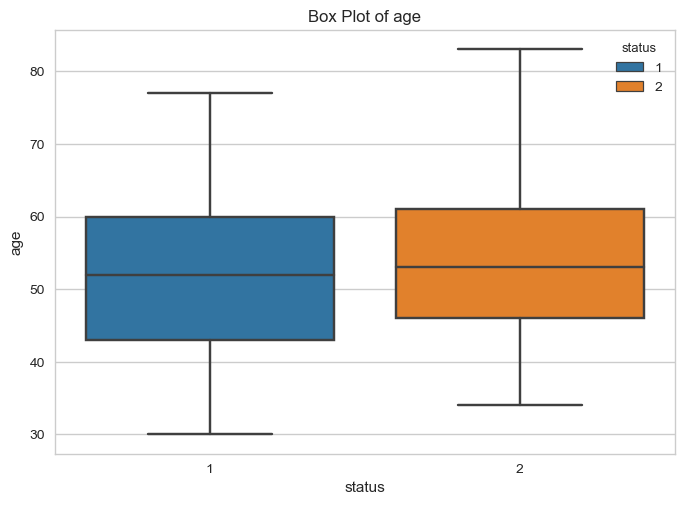

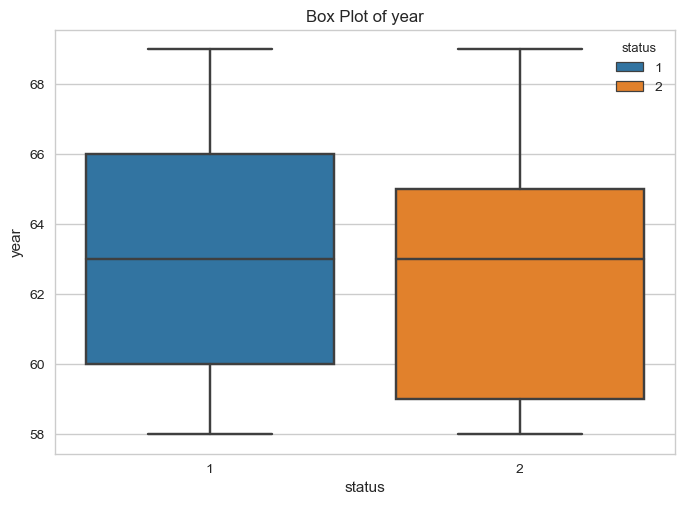

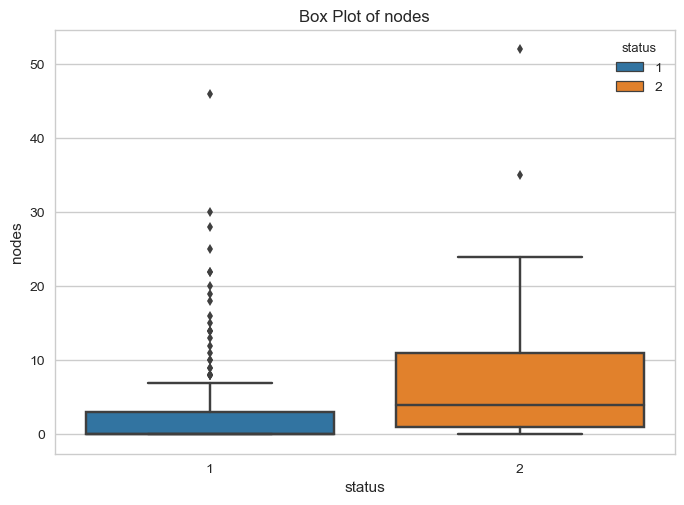

In [11]:
for feature in df_haber.columns[:-1]:
    sns.boxplot(x='status',y=feature, data=df_haber,hue="status",dodge=False).set_title('Box Plot of ' + feature)
    plt.show()

**Observation:**
    
    1.Maximum people having node less than 5 have a higher chance of survival .
    2.There are also few ouliers for people with status as 1.

### (2.5) Violin Plot

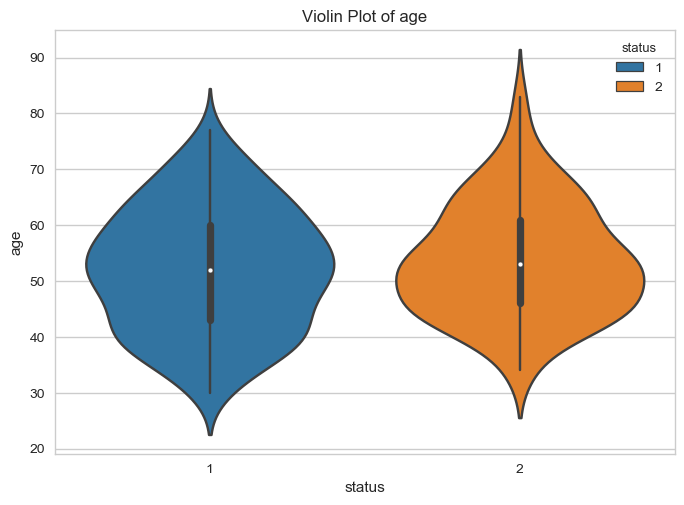

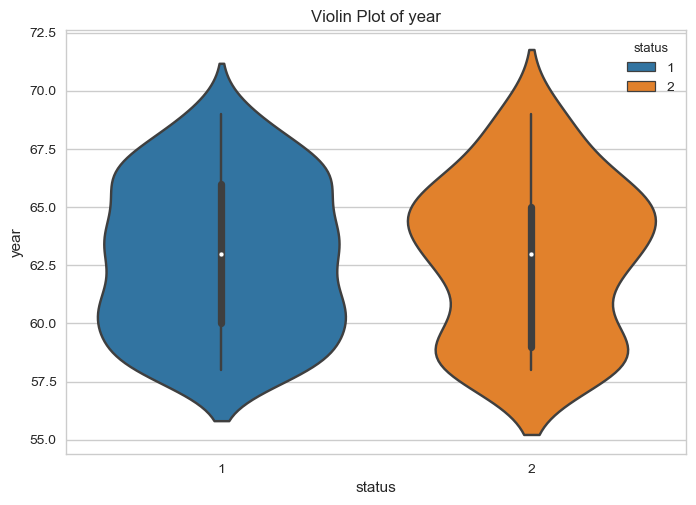

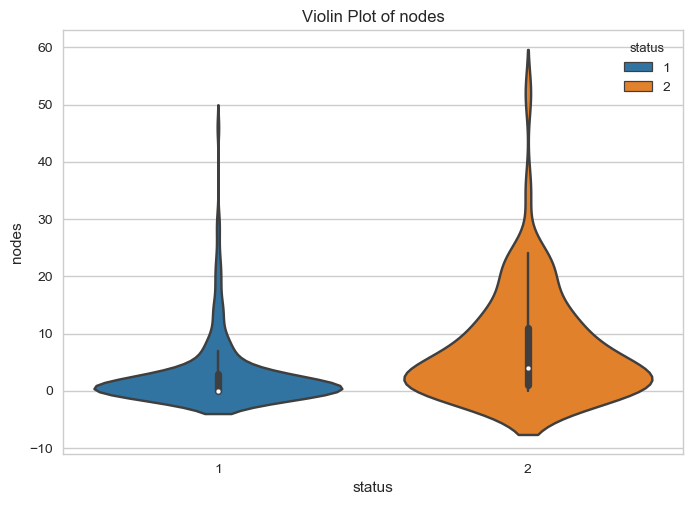

In [12]:
for feature in df_haber.columns[:-1]:
    sns.violinplot(x="status",y=feature,data=df_haber,hue="status",dodge=False).set_title('Violin Plot of ' + feature)
    plt.show()

**Observation:**
    
    1.Number of nodes for the survier is highly densed around 0 node.
    2.Younger people have slightly higher chance of survical than the older ones.
    3.Patients treated after 1965 have a better survival percentage and patients trated before 1960 have lower chance of survival .

### (2.6) Contour Plot

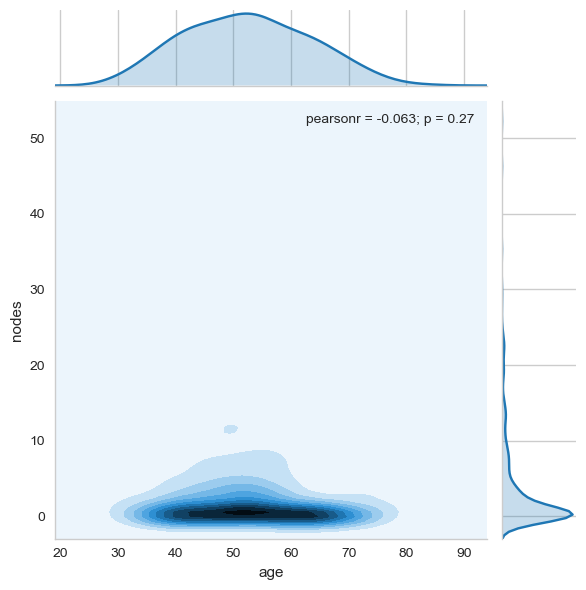

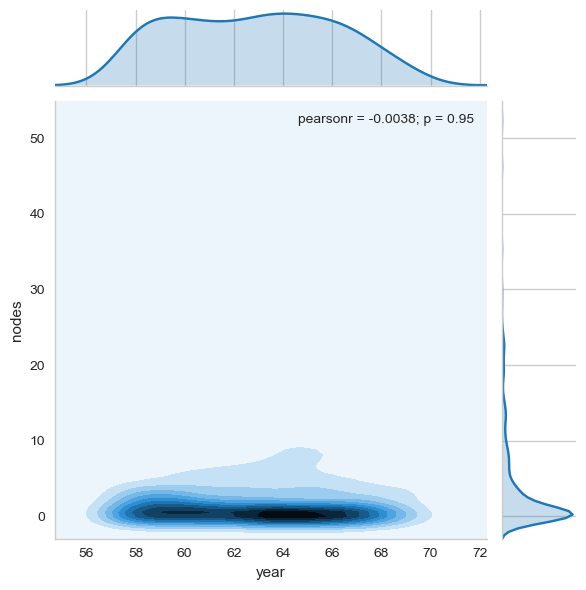

In [13]:
sns.jointplot(x="age", y="nodes", data=df_haber, kind="kde");
plt.show();
sns.jointplot(x="year", y="nodes", data=df_haber, kind="kde");
plt.show();

### Correlation

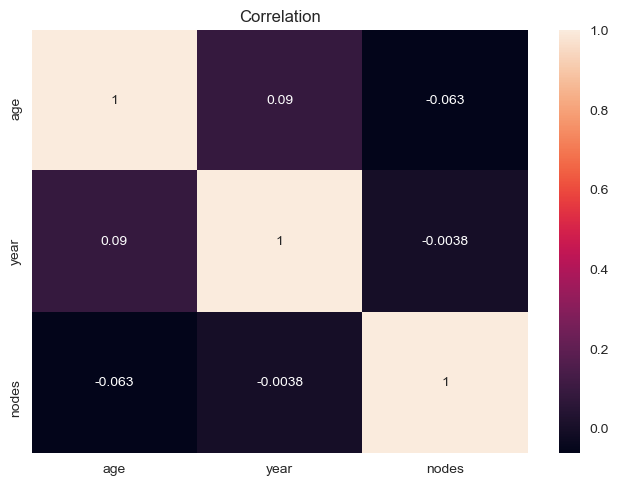

In [14]:
corr = df_haber.loc[:, df_haber.columns != 'status'].corr()
plot2 = sns.heatmap(corr,annot=True).set_title('Correlation')

**Observation:**
    None of the features are correlated to each other 

### **Final Conclusion**

    1) Use node feature to classify the status of a patient.
    2) Patient with lower nodes have higher percentage of survival rate.
    3) Younger people have more chances of surviving.